<a href="https://colab.research.google.com/github/Birkbeck/msc-projects-2023-4-Gabriele_Monti_PEFT/blob/main/resume_data_prep_model_training_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Resume Data Processing with Gemma**
In this Colab notebook, we will explore how to preprocess resume data and prepare it for model training using the Gemma architecture. The goal is to convert unstructured resume text into a structured JSON format, facilitating downstream tasks such as information extraction and natural language understanding.
The original dataset comes from Kaggle
https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset

In [7]:
#load a subset of 1000 example that was prepared in advance

import pandas as pd

df = pd.read_csv("/content/subset1.csv")

In [8]:
df


,ID,Resume_str
0,40088790,PERSONAL BANKER(SAFE)1 AND BUSINESS A...
1,16861758,HR ASSISTANT Professional S...
2,28973180,SALES / FINANCE MANAGER Summary...
3,17033567,"VIDEO DIRECTOR, EAST COAST VIDEO FOR ..."
4,49119887,MARKETING & PUBLIC RELATIONS MANAGER ...
...,...,...
995,40883703,SENIOR MARKETING MANAGER Execut...
996,29161565,RADIOLOGICAL CONTROL TECHNICIAN ...
997,21570485,COORDINATING MANAGER Summary ...
998,97449528,OFFICE SUPPORT COORDINATOR Summ...


In [ ]:

# install openair for annoatating the entries

!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00


In [ ]:

#example for GTP3.5 turbo
#One exmple is prepared for the model to then generate the json annotation
#GTP3.5 turbo is very flexible model so one example is sufficient

text='''

HR ASSISTANT Professional Summary I am a HR Assistant who can reflect your values of excellence & quality. I provide excellent customer service for a variety of services while multi-tasking, maintaining confidentiality, and interacting with management, employees, customers, and vendors. I am currently furthering my education in the medical field. I look forward to working in an environment that enables me use of my skills to gain further experience. Skill Highlights Strong organizational skills Sharp problem solver Active listening skills Courteous demeanor Energetic work attitude Work Experience Company Name April 2008 to Current HR Assistant City , State Assemble employee new hire packs Setting up, monitoring and then tracking employee probationary periods Carrying out background and reference checks on prospective employees Acting as the first point of contact for anyone enquiring about a vacancy Maintenance of the HR records and systems Tracking of any employee anniversaries and awards they are due Developing reports for HR Director on clinical staff quotas Screening phone calls, emails, letters and personal visits Quality Assurance tracking/monitoring quarterly. Company Name July 2007 to April 2008 Client Service Representative City , State Scheduled aides and Nurses for varies Clients Scheduled and Completed DNA Collections Completed Orientation for field staff new hires Verified Payroll for field staff employees Creating Files for clients and employees Execution of On-Call responsibilities and Scheduling Making Copies, File and Fax Maintain Compliance rules for various clients Updating and Typing Physician orders CAP meetings with managers. Company Name October 2005 to October 2006 Assistant / Office Manager City , State Scheduled appointment of Client's and answer the telephone for 2 offices. Arranged for hospital admission and laboratory services Recorded medical history and vital signs, explaining treatment procedures to Clients Preparing Client's for examination and assisting the Physician during the examination Collected and prepare laboratory specimens of perform basic laboratory tests Disposed of contaminated supplies and sterilize medical instruments Assist doctor during procedures such as pap smears, endometrial biopsies. Data-entry Client's Insurance information into the database system Maintained files and completed pre-natal records when lab reports are returned. Faxing and filing verifying insurance and updates on insurance In-services with organizations such as Komen foundation, many drug representatives Preceptor - assist other co-worker with their duties. Company Name May 2000 to June 2006 Obstetrician Technician City , State Set-up patients on fetal monitors Scheduled Client's for cesarean section deliveries Data entry patient's information into database in the Qs system Cleaned and sterilize instruments Ordered supplies for the Labor and Delivery Measured patient's temperature, blood pressure, pulse, height and weight to record the patient's vital signs Supervised the release of information to physicians, insurance companies, and others in accordance with departmental policy, New Jersey Laws, and other regulations affecting medical records Reviewed medical records for completeness and accuracy; initiates procedures to facilitate prompt completion of records by Physicians; refers incomplete or inaccurate records for correction Reviewed policies and procedures to assure compliance with the Joint Commission on Accreditation of Hospitals and other regulatory agencies Supervised filing and issuance of records to authorized personnel Evaluated and revised medical records procedures and forms to identify more efficient and complete methods of maintaining medical records and data Knowledge of medical recordkeeping principles and practices Reviewed, coded and indexing of patients records and the abstraction of data for reports Knowledge of medical ethics and medical terminology Knowledge of hospital policies and state regulations Ability to recognize adverse signs and symptoms in patients Ability to establish and maintain effective working relationships with subordinates, physicians other medical and administrative personnel Ability to utilize various types of electronic and/or manual recording and information systems used by the office or related units Knowledge of the techniques used to administer pulmonary and cardiac resuscitation Knowledge of the appropriate emergency treatment depending on the patient's condition Ability to prioritized emergency medical treatment needs Ability to remain calm in a crisis situation Maintained necessary records and files. Company Name March 1999 to January 2000 Pharmacy Technician City , State Retrieved patient's information from the computer Provide Client's information to pharmacist and other Healthcare facilities. Filled prescriptions with assistance from pharmacist Answered phones Inventory coordinate. Skills Professional and friendly. Careful and active listener. Multi-tasking. Careful and active listener. Education and Training Edgecombe Community College Present Select One : Nursing City , State , United States Continuing education in Nursing. Nash Community College 07/08 Certified Nursing Assistant 03/07-05/07 Nash Community College - Certified Nursing Assistant 2 : CNA City , State , United States Continuing education in Nursing

You need to produce a json file following exactly this structure:

{
  "resumes": [
    {
      "name": "George Jorgos",
      "email": "G.M@gmail.com",
      "phone": "44-55-7866490",
      "experience": "Experienced HR Assistant with a background spanning various roles including HR administration, client service, and office management. Skilled in assembling new hire packs, managing probationary periods, conducting background checks, and maintaining HR records. Proficient in scheduling, payroll verification, compliance maintenance, and quality assurance tracking. Previous roles include Client Service Representative and Assistant / Office Manager.",
      "education": "Currently pursuing nursing education at Edgecombe Community College. Certified Nursing Assistant (CNA) from Nash Community College.",
      "skills": [
        "Organizational Skills",
        "Problem Solving",
        "Active Listening",
        "Customer Service",
        "Energetic Work Attitude",
        "Data Entry",
        "Compliance Management",
        "Scheduling",
        "Quality Assurance"
      ]
    }
  ]
}
'''

In [ ]:
#First test with one example to see if the output is satisfactory.

#from openai import OpenAI

api_key = "sk-None-xxxxxxxxxxxxxxxxxxxxxxxxxxxx"
client = OpenAI(api_key=api_key)

resume_text = df.sample(n=1)['Resume_str'].iloc[0]

print (resume_text)

#print (resume_text)
prompt=f"read and learn this example {text} then read this resume and output a json following resume {resume_text} the same structure in the example"

#print (prompt)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",  # You can replace this with the latest available model suitable for your task.
    max_tokens=300,
)

# Print the generated question
generated_question = chat_completion.choices[0].message.content
print("Generated question:", generated_question)


df['questions'] = df['info'].apply(write_question)

         FINANCE MANAGER       Summary    Ability to communicate effectively to customers, management and staff. Establish rapport with clients from diverse socio-economic and ethnic backgrounds. Ability to deal with crisis in a calm, professional manner.      Highlights          Team leadership  Accomplished in relationship selling  Friendly and cheerful  Approachable  Proven sales track record  Goal-oriented  Exceptional time management  Adept at closing sales  Sales management                Experience      Finance Manager   01/2013   －   03/2016     Company Name     City  ,   State       Lasco Ford.  As the lead finance manager my responsibilities were numerous.  My primary responsibility is to represent the dealership and abide by all the legal and ethical guidelines set forth under Federal Law.  I aslo present all available products to 100% of the purchasing customers 100% of the time.I explain all the benefits unique to each available product.  I am responsible for gathering all

The output of our initial trial looks promising, and the JSON file is well-formed. Therefore, we can proceed to the next steps with confidence.

In [ ]:
# This code is designed for batch processing and includes periodic saving.
# As we are processing 1000 rows better make sure that all works fine.

#test_df = df.head(10)

counter = 0  # Initialize a counter to track the number of processed rows

def generate_completion(resume_text):
    global counter
    prompt = f"read and learn this example {text} then read this resume and output a json following resume {resume_text} the same structure in the example"
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "user", "content": prompt}
        ],
        model="gpt-3.5-turbo",  # Adjust the model as needed
        max_tokens=300
    )
    counter+=1
    print(f"Processed {counter} rows")
    return chat_completion.choices[0].message.content


# Applying the function to each resume in the DataFrame


df['Generated_JSON'] = df['Resume_str'].apply(generate_completion)

if counter % 10 == 0:
    print(f"Processed {counter} rows")
    df.to_csv("/content/drive/MyDrive/11111111/resume/updated_with_results.csv", index=False)


# Now, df includes a new column 'Generated_JSON' with the processed outputs
print(df.head())

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv("/content/drive/MyDrive/11111111/resume/updated_with_results.csv", index=False)

         ID                                         Resume_str  \
0  40088790           PERSONAL BANKER(SAFE)1 AND BUSINESS A...   
1  16861758           HR ASSISTANT           Professional S...   
2  28973180           SALES / FINANCE MANAGER       Summary...   
3  17033567           VIDEO DIRECTOR, EAST COAST VIDEO FOR ...   
4  49119887           MARKETING & PUBLIC RELATIONS MANAGER ...   

                                      Generated_JSON  
0  {\n  "resumes": [\n    {\n      "name": "Jane ...  
1  {\n  "resumes": [\n    {\n      "name": "HR As...  
2  {\n  "resumes": [\n    {\n      "name": "John ...  
3  {\n  "resumes": [\n    {\n      "name": "John ...  
4  {\n  "resumes": [\n    {\n      "name": "Jane ...  


<ipython-input-41-238582ecd7ef>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Generated_JSON'] = test_df['Resume_str'].apply(generate_completion)


In [ ]:
test_df

,ID,Resume_str,Generated_JSON
0,40088790,PERSONAL BANKER(SAFE)1 AND BUSINESS A...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ..."
1,16861758,HR ASSISTANT Professional S...,"{\n ""resumes"": [\n {\n ""name"": ""HR As..."
2,28973180,SALES / FINANCE MANAGER Summary...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
3,17033567,"VIDEO DIRECTOR, EAST COAST VIDEO FOR ...","{\n ""resumes"": [\n {\n ""name"": ""John ..."
4,49119887,MARKETING & PUBLIC RELATIONS MANAGER ...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ..."
5,28635795,DRIVER Summary As a pass...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
6,92283635,MAINTENANCE SPECIALIST/TECHNICIAN ...,"{\n ""resumes"": [\n {\n ""name"": ""Adam ..."
7,23568641,BUSINESS DEVELOPMENT EXECUTIVE ...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
8,74512244,FINANCE OFFICE ASSOCIATE Profes...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
9,26835781,BEHAVIORAL INTERVENTIONIST Su...,"{\n ""resumes"": [\n {\n ""name"": ""Alex ..."


In [ ]:
#the final version that saves all rows

import pandas as pd
from openai import OpenAI

# Initialize the OpenAI client with your API key
client = OpenAI(api_key=api_key)

# Assuming your DataFrame 'df' is already loaded
# df = pd.read_csv("your_data.csv")  # Uncomment this line if needed

def generate_completion(resume_text):
    prompt = f"read and learn this example {text} then read this resume and output a json following resume {resume_text} the same structure in the example"
    chat_completion = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="gpt-3.5-turbo",  # Adjust the model as needed
        max_tokens=300
    )
    return chat_completion.choices[0].message.content

# Initialize a counter to track the number of processed rows
counter = 0

# List to store JSON outputs temporarily
json_outputs = []

# Iterate through each resume in the DataFrame
for index, row in df.iterrows():
    json_output = generate_completion(row['Resume_str'])
    json_outputs.append(json_output)
    counter += 1  # Increment the counter after processing each row

    # Save the DataFrame every 10 rows
    if counter % 10 == 0:
        df['Generated_JSON'] = pd.Series(json_outputs)
        df.to_csv("/content/drive/MyDrive/11111111/resume/updated_with_results.csv", index=False)
        print(f"Progress saved: {counter} resumes processed.")

# Assign the generated JSON outputs to the DataFrame after processing all rows
df['Generated_JSON'] = pd.Series(json_outputs)

# Final save to ensure all changes are written to the file
df.to_csv("/content/drive/MyDrive/11111111/resume/updated_with_results.csv", index=False)
print("Final save completed. All data processed and saved.")
print(df.head())


Progress saved: 10 resumes processed.
Progress saved: 20 resumes processed.
Progress saved: 30 resumes processed.
Progress saved: 40 resumes processed.
Progress saved: 50 resumes processed.
Progress saved: 60 resumes processed.
Progress saved: 70 resumes processed.
Progress saved: 80 resumes processed.
Progress saved: 90 resumes processed.
Progress saved: 100 resumes processed.
Progress saved: 110 resumes processed.
Progress saved: 120 resumes processed.
Progress saved: 130 resumes processed.
Progress saved: 140 resumes processed.
Progress saved: 150 resumes processed.
Progress saved: 160 resumes processed.
Progress saved: 170 resumes processed.
Progress saved: 180 resumes processed.
Progress saved: 190 resumes processed.
Progress saved: 200 resumes processed.
Progress saved: 210 resumes processed.
Progress saved: 220 resumes processed.
Progress saved: 230 resumes processed.
Progress saved: 240 resumes processed.
Progress saved: 250 resumes processed.
Progress saved: 260 resumes proces

In [ ]:
#reload the file from google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/11111111/resume/updated_with_results.csv')

In [ ]:

df

,ID,Resume_str,Generated_JSON
0,40088790,PERSONAL BANKER(SAFE)1 AND BUSINESS A...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ..."
1,16861758,HR ASSISTANT Professional S...,"{\n ""resumes"": [\n {\n ""name"": ""HR As..."
2,28973180,SALES / FINANCE MANAGER Summary...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
3,17033567,"VIDEO DIRECTOR, EAST COAST VIDEO FOR ...","{\n ""resumes"": [\n {\n ""name"": ""John ..."
4,49119887,MARKETING & PUBLIC RELATIONS MANAGER ...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
...,...,...,...
995,40883703,SENIOR MARKETING MANAGER Execut...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ..."
996,29161565,RADIOLOGICAL CONTROL TECHNICIAN ...,"{\n ""resumes"": [\n {\n ""name"": ""John ..."
997,21570485,COORDINATING MANAGER Summary ...,"{\n ""resumes"": [\n {\n ""name"": ""Amy S..."
998,97449528,OFFICE SUPPORT COORDINATOR Summ...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ..."


This is out final and annotated dataset, GTP3.5 has sucessfully completed the task

In [ ]:
#contatenation of the various part of the training, to outout the final string
df['text'] = '###resume: ' + df['Resume_str'] + ' ###json: ' + df['Generated_JSON']

In [ ]:
df.head(2)

,ID,Resume_str,Generated_JSON,text
0,40088790,PERSONAL BANKER(SAFE)1 AND BUSINESS A...,"{\n ""resumes"": [\n {\n ""name"": ""Jane ...",###resume: PERSONAL BANKER(SAFE)1 AND...
1,16861758,HR ASSISTANT Professional S...,"{\n ""resumes"": [\n {\n ""name"": ""HR As...",###resume: HR ASSISTANT Pro...


In [ ]:
#saving the file as csv format as it will be needed for the finetuning in Hugging Face Auto Train app.
df[['text']].to_csv('output_text.csv', index=False)

In [1]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("theoracle/resume2json")

# Save the dataset to the specified directory
ds.save_to_disk("/content/data")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

**Auto Train From hugging Face**

The code below is just a placeholder for the Auto Train from Hugging Face. Auto Train as a convenient interface and we do not need any code. Auto train is particularly convenient as we do not need to worry about the hardware.
Therefore the model is trained somewhere else, please see here for details https://huggingface.co/autotrain


In [ ]:
!pip install -U autotrain-advanced > install_logs.txt 2>&1
from IPython.display import display
from autotrain.app.colab import colab_app
elements = colab_app()
display(elements)

#google/gemma-2b
#theoracle/resume2json

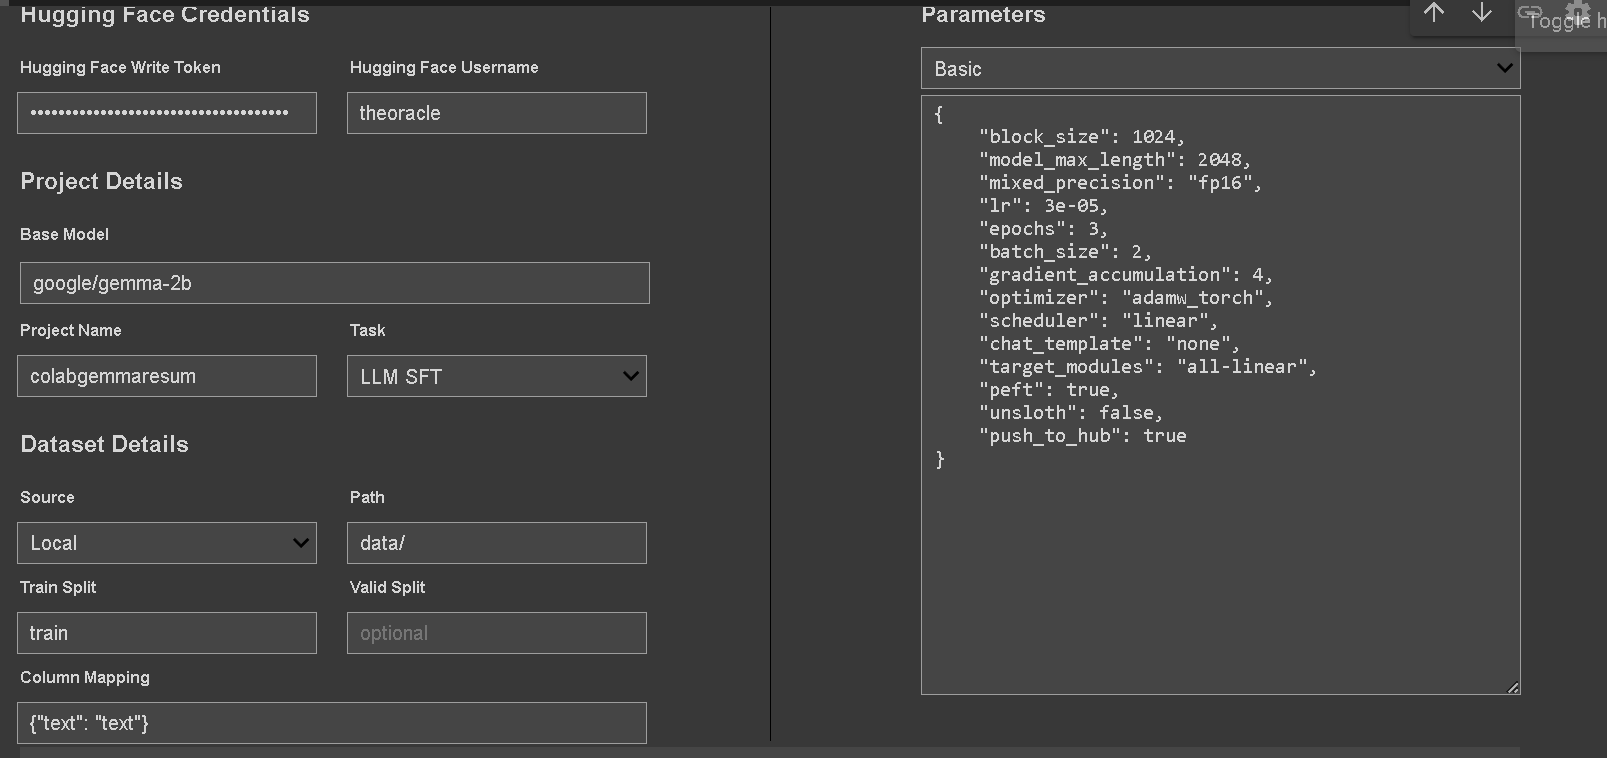

In [1]:
from huggingface_hub import notebook_login

notebook_login()


#xxxxx

In [2]:
!pip install peft
!pip install transformers
!pip install --upgrade peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [3]:
#now the PEFT trained model is reloaded using the transformers from Hugging face


import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_path = "theoracle/resume2"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load the model
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="auto",
    torch_dtype='auto',
     trust_remote_code=True
).eval()

# Check for CUDA availability and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/78.5M [00:00<?, ?B/s]

In [4]:
# Example: now we create a sample resume for the model to generate the json
#the generation will start after the prefix ###json:

prompt = '''###resume: name: John Doe
Email: J.D@gmail.com
Phone: 55-66-1234567
I am an experienced Director of Business Development with a proven track record in establishing effective sales, marketing, and outreach strategies across various industries. I excel in client interaction, creating impactful presentations, developing online marketing campaigns, and maintaining robust business relationships. Throughout my career, I have successfully held numerous leadership roles, including Director, Owner, Vice President, and Manager.
I hold an MBA from Lebanon Valley College and a Bachelor's degree in International Studies from the Central Atlantic Intermediate School of Banking. I have also pursued additional studies at Dickinson College and Indiana University of Pennsylvania.
I am highly skilled in a wide range of areas, including banking, client management, and database management. I demonstrate strong strategic direction and email marketing capabilities and have extensive experience in senior management and fundraising. Additionally, I am well-versed in government affairs, human resources, insurance, and legal knowledge. My marketing strategies and meeting management skills are complemented by my proficiency with the Microsoft Office Suite and my ability to network effectively.
My expertise also includes online marketing, organizational skills, and personnel management. I am adept at delivering compelling presentations and have a solid understanding of real estate and research methodologies. My commitment to safety regulations, sales techniques, and seminar organization further enhances my professional profile. Moreover, I am experienced in staffing and strategic planning, making me a versatile and valuable asset in any business development role.
###json: '''

In [ ]:
prompt4='''
**Lena Rivera**
Email: lena.rivera@email.com
Phone: 987-654-3210

I am currently serving as the Chief Technology Officer at Innovatech Solutions, a position I've held since January 2018, based in San Francisco, CA. My role involves overseeing the development and deployment of innovative software solutions that leverage cloud computing and AI to enhance business efficiency. Prior to this, I was a Senior Software Engineer at TechAdvance from June 2013 to December 2017, where I led multiple high-profile projects focusing on big data and predictive analytics.

I founded GreenCode, a non-profit organization dedicated to teaching coding skills to underprivileged youth, in March 2015. Through this initiative, we have introduced over 5,000 students to the basics of programming, web development, and cybersecurity.

My academic background includes a Master’s degree in Computer Science from MIT, completed in 2013, where my research focused on artificial intelligence and machine learning applications in real-time systems. I hold a Bachelor’s degree in Software Engineering from the University of California, Berkeley, completed in 2010.

My technical skills are deeply rooted in programming languages such as Python, Java, and C++. I am proficient in managing both SQL and NoSQL databases, and have extensive experience with AWS cloud services. I am also skilled in project management, strategic planning, and team leadership.

Languages: I am fluent in English and Spanish, with full professional proficiency in both.
###json:
'''


In [ ]:
prompt1 = '''### Resume
**Jane Smith**
Email: jane.smith@email.com
Phone: 123-456-7890
I am a seasoned Marketing Manager with extensive experience in developing and implementing innovative marketing strategies that drive business growth. I excel in market research, brand management, digital marketing, and team leadership. Throughout my career, I have held roles such as Marketing Coordinator, Senior Marketing Specialist, and Marketing Director. I possess a broad range of skills including strategic planning, content creation, social media marketing, and campaign management. I have a strong background in SEO, PPC, email marketing, and market analysis. My leadership skills are complemented by my ability to manage cross-functional teams and drive successful marketing initiatives. Additionally, I am proficient in using various marketing tools and platforms such as Google Analytics, HubSpot, and Salesforce. My expertise also includes event planning, public relations, and customer relationship management. I am adept at developing comprehensive marketing plans and executing them effectively to achieve business objectives. My analytical skills allow me to measure the success of marketing campaigns and make data-driven decisions. Moreover, I am experienced in budget management and can efficiently allocate resources to maximize ROI. I hold an MBA from Harvard Business School and a Bachelor's degree in Marketing from the University of California, Berkeley. I have also completed certifications in Digital Marketing and Brand Management. I am a results-oriented professional with a passion for marketing and a commitment to excellence.
My ability to adapt to changing market trends and my dedication to continuous learning make me a valuable asset in any marketing role.
###json: '''


In [ ]:
prompt2 = '''### Resume
**Gabriele Monti** Email: gabriele@email.com Phone: 123-456-7890
I am currently a Data Scientist at THE COIN ORACLE, self-employed since June 2021, based in London, UK. My work involves developing machine learning algorithms for cryptocurrency analysis. I am also the Founder & Director of EmiliaDelizia.com since January 2009, in London, UK, where I manage gourmet Italian food travel packages. As the Business Owner of Language Media LTD since January 2009, also in London, I specialize in SEO, multilingual content management, and social media marketing. From August 2014 to January 2018, I served as Founder and Director at Sfoodle.com,
operating an online marketplace for artisan food in London, UK. Additionally, I was the School Manager and Director at TheLanguageClass.com from January 2005 to January 2017 in London, where I provided multilingual language learning solutions; Education: I completed a PG Cert in Applied Data Science at Birkbeck, University of London in 2021 and am pursuing a Master of Data Science in Computer Science, expected to finish in August 2023 at Birkbeck, University of London; Skills:
My skills include Jupyter and Bayesian Statistics, I am native or bilingual in English and have full professional proficiency in French.
###json:
'''


In [5]:
#this script will use the model and generate the output given the prompt


# Tokenize and generate text
encoding = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True, max_length=500, add_special_tokens=True)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

output_ids = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_new_tokens=250,
    do_sample=True,
    temperature=0.6,
    #top_p=0.95,
    pad_token_id=tokenizer.eos_token_id
)

generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(generated_text)


###resume: name: John Doe
Email: J.D@gmail.com
Phone: 55-66-1234567
I am an experienced Director of Business Development with a proven track record in establishing effective sales, marketing, and outreach strategies across various industries. I excel in client interaction, creating impactful presentations, developing online marketing campaigns, and maintaining robust business relationships. Throughout my career, I have successfully held numerous leadership roles, including Director, Owner, Vice President, and Manager.
I hold an MBA from Lebanon Valley College and a Bachelor's degree in International Studies from the Central Atlantic Intermediate School of Banking. I have also pursued additional studies at Dickinson College and Indiana University of Pennsylvania.
I am highly skilled in a wide range of areas, including banking, client management, and database management. I demonstrate strong strategic direction and email marketing capabilities and have extensive experience in senior mana

**Success!!! we can see that given the resume the model was able to generate the json

In [6]:
#model evaluation with the weightwatcher library.

! pip install weightwatcher


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 3.0 MB/s eta 0:00:00


In [8]:
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
details = watcher.analyze()

In [10]:
import pandas as pd

# Display the analysis results
results_df = pd.DataFrame(details)
results_df

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,6,lora.Linear\n \n \n \n )\n \n \n )\...,0.059188,2048,2048,1.0,3.835733,6.205800,0.984845,True,...,0.244061,41.485031,29.415191,success,6.440887,0.000090,,11,41.485031,2.308936
1,7,Linear,0.059188,2048,2048,1.0,3.835733,6.205800,0.984845,True,...,0.244061,41.485031,29.415191,success,6.440887,0.000090,,11,41.485031,2.308936
2,11,Linear,0.124582,16,2048,128.0,6.467715,-0.496133,0.984715,True,...,1.461308,0.838090,7.018663,success,0.915473,0.537037,under-trained,0,0.838090,0.304056
3,13,Linear,0.062460,16,2048,128.0,1.646134,-2.353036,0.095609,True,...,0.172686,0.037202,1.042584,success,0.192879,0.004173,over-trained,0,0.037202,0.000025
4,16,lora.Linear\n \n \n \n )\n \n \n )\...,0.058855,256,2048,8.0,6.207225,4.027015,0.977590,True,...,0.856062,4.454126,40.125145,success,2.110480,0.133142,under-trained,0,4.454126,1.124174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1374,Linear,0.063653,16,16384,1024.0,1.807567,-0.008116,0.310436,True,...,0.223979,0.989715,1.219775,success,0.994844,0.056389,over-trained,0,0.989715,0.004689
500,1377,lora.Linear\n \n \n \n )\n \n \n )\...,0.023906,2048,16384,8.0,5.084275,8.970984,1.087985,True,...,0.231227,58.137569,208.327673,success,7.624800,0.497891,,0,58.137569,9.016904
501,1378,Linear,0.023906,2048,16384,8.0,5.084275,8.970984,1.087985,True,...,0.231227,58.137569,208.327673,success,7.624800,0.497891,,0,58.137569,9.016904
502,1382,Linear,0.176400,16,16384,1024.0,3.233028,0.629263,0.942730,True,...,0.844005,1.565438,4.842209,success,1.251175,0.566812,,0,1.565438,0.354396


In [18]:
# Filter for under-trained and over-trained warnings
undertrained_df = results_df[results_df['warning'] == 'under-trained']
overtrained_df = results_df[results_df['warning'] == 'over-trained']

# Display the filtered DataFrames

undertrained_df



,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
2,11,Linear,0.124582,16,2048,128.0,6.467715,-0.496133,0.984715,True,...,1.461308,0.838090,7.018663,success,0.915473,0.537037,under-trained,0,0.838090,0.304056
4,16,lora.Linear\n \n \n \n )\n \n \n )\...,0.058855,256,2048,8.0,6.207225,4.027015,0.977590,True,...,0.856062,4.454126,40.125145,success,2.110480,0.133142,under-trained,0,4.454126,1.124174
5,17,Linear,0.058855,256,2048,8.0,6.207225,4.027015,0.977590,True,...,0.856062,4.454126,40.125145,success,2.110480,0.133142,under-trained,0,4.454126,1.124174
6,21,Linear,0.129184,16,2048,128.0,9.259618,-2.498746,0.996630,True,...,2.290806,0.537212,10.445852,success,0.732948,0.540047,under-trained,0,0.537212,0.317934
10,31,Linear,0.152524,16,2048,128.0,11.503368,-4.143027,0.998287,True,...,3.501123,0.436357,12.460747,success,0.660573,0.529280,under-trained,0,0.436357,0.332533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,1330,Linear,0.098173,16,2048,128.0,9.628948,-2.550029,0.996064,True,...,2.728713,0.543464,10.496059,success,0.737200,0.547721,under-trained,0,0.543464,0.338002
484,1335,lora.Linear\n \n \n \n )\n \n \n )\...,0.036094,256,2048,8.0,6.872023,4.717786,0.993405,True,...,0.906073,4.858707,94.377186,success,2.204247,0.190373,under-trained,0,4.858707,2.608485
485,1336,Linear,0.036094,256,2048,8.0,6.872023,4.717786,0.993405,True,...,0.906073,4.858707,94.377186,success,2.204247,0.190373,under-trained,0,4.858707,2.608485
486,1340,Linear,0.141061,16,2048,128.0,11.175160,-3.865009,0.998210,True,...,3.217668,0.450965,12.436279,success,0.671539,0.541659,under-trained,0,0.450965,0.338415


In [19]:
overtrained_df

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
3,13,Linear,0.062460,16,2048,128.0,1.646134,-2.353036,0.095609,True,...,0.172686,0.037202,1.042584,success,0.192879,0.004173,over-trained,0,0.037202,0.000025
7,23,Linear,0.068478,16,256,16.0,1.690546,-4.302306,0.411316,True,...,0.191523,0.002852,1.404796,success,0.053400,0.002689,over-trained,0,0.002852,0.000016
11,33,Linear,0.205058,16,256,16.0,1.599473,-4.220938,0.107089,True,...,0.299737,0.002296,1.051298,success,0.047921,0.000871,over-trained,2,0.002296,0.000013
15,43,Linear,0.070050,16,2048,128.0,1.741704,-3.026936,0.224277,True,...,0.214112,0.018285,1.138574,success,0.135220,0.004798,over-trained,0,0.018285,0.000054
19,55,Linear,0.069015,16,16384,1024.0,1.850714,-1.331707,0.345831,True,...,0.245580,0.190738,1.251379,success,0.436735,0.022338,over-trained,0,0.190738,0.001296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1342,Linear,0.132708,16,256,16.0,1.558553,-3.848517,0.691195,True,...,0.149280,0.003394,3.415099,success,0.058258,0.004631,over-trained,0,0.003394,0.000054
491,1352,Linear,0.077502,16,2048,128.0,1.741171,-2.189106,0.355186,True,...,0.185293,0.055302,1.267924,success,0.235163,0.014430,over-trained,0,0.055302,0.000208
495,1364,Linear,0.048452,16,16384,1024.0,1.711378,-0.128104,0.295091,True,...,0.177844,0.841677,1.200485,success,0.917430,0.047321,over-trained,0,0.841677,0.002239
499,1374,Linear,0.063653,16,16384,1024.0,1.807567,-0.008116,0.310436,True,...,0.223979,0.989715,1.219775,success,0.994844,0.056389,over-trained,0,0.989715,0.004689


In [12]:
watcher.analyze()
summary = watcher.get_summary()
print(summary)


{'log_norm': 1.6533578949584984, 'alpha': 5.305512742383686, 'alpha_weighted': 2.9621337380084163, 'log_alpha_norm': 3.164429125774414, 'log_spectral_norm': 0.4268605097633952, 'stable_rank': 59.99080779789094}


In [14]:
summary_df = pd.DataFrame([summary])

# Display the DataFrame
summary_df

,log_norm,alpha,alpha_weighted,log_alpha_norm,log_spectral_norm,stable_rank
0,1.653358,5.305513,2.962134,3.164429,0.426861,59.990808


In [ ]:
#his code demonstrates how to combine two JSON objects containing resume data into a single JSON object.
#Each JSON object contains a list of resumes, and the combined JSON object merges these lists.
#this might be useful if later one we want to contatenate all the json outputs in sone single representation

import json

# Example JSON from the first provided snippet
example_json_1 = {
    "resumes": [
        {
            "name": "Alex D. Meredith",
            "email": "ameredith@desu.edu",
            "phone": "(302) 241-7315",
            "experience": "Experienced education professional with a background in behavioral intervention, recruitment, advising, teaching, and coordination. Skilled in establishing positive rapport with clients, utilizing therapeutic listening skills, participating in treatment planning, and identifying community resources. Previous roles include Recruiter, Advisor, Teacher/Coordinator, and Adjunct Professor.",
            "education": "Master of Science in Plant and Soil Science Agriculture Education from Southern Illinois University Carbondale, Master of Science in Agriculture Economics International Trade from North Carolina A&T State University, Bachelor of Science in Agriculture Business from Delaware State University.",
            "skills": [
                "Therapeutic Listening",
                "Treatment Planning",
                "Community Resources",
                "Recruitment",
                "Advising",
                "Professional Development",
                "Classroom Management",
                "Teaching",
                "Curriculum Planning"
            ]
        }
    ]
}

# Assuming the second JSON should look similar to the first
example_json_2 = {
    "resumes": [
        {
            "name": "John Doe",
            "email": "jdoe@example.com",
            "phone": "(123) 456-7890",
            "experience": "Software engineer with extensive experience in web development and systems architecture. Skilled in multiple programming languages including Python, JavaScript, and C#.",
            "education": "Bachelor of Science in Computer Science from Tech University.",
            "skills": [
                "Web Development",
                "Systems Architecture",
                "Programming",
                "Project Management"
            ]
        }
    ]
}

# Combine the resumes from both examples into one JSON object
combined_json = {
    "resumes": example_json_1["resumes"] + example_json_2["resumes"]
}

# Convert the combined JSON object to a string (if needed for output or further processing)
combined_json_str = json.dumps(combined_json, indent=4)
print(combined_json_str)


{
    "resumes": [
        {
            "name": "Alex D. Meredith",
            "email": "ameredith@desu.edu",
            "phone": "(302) 241-7315",
            "experience": "Experienced education professional with a background in behavioral intervention, recruitment, advising, teaching, and coordination. Skilled in establishing positive rapport with clients, utilizing therapeutic listening skills, participating in treatment planning, and identifying community resources. Previous roles include Recruiter, Advisor, Teacher/Coordinator, and Adjunct Professor.",
            "education": "Master of Science in Plant and Soil Science Agriculture Education from Southern Illinois University Carbondale, Master of Science in Agriculture Economics International Trade from North Carolina A&T State University, Bachelor of Science in Agriculture Business from Delaware State University.",
            "skills": [
                "Therapeutic Listening",
                "Treatment Planning",
        